<a href="https://colab.research.google.com/github/anishareddy04/ML_CSE_21206A/blob/ML_LAB_CODES/ML_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1. Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND
gate logic. The activation function is demonstrated below.


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
def step_func(z):
  return 1 if (z>0) else 0
def Bipolar_step_func(z):
  return 1 if (z>0) else -1
def Relu_func(z):
  return z if (z>0) else 0
def sigmoid_func(z):
  x=1/(1+math.exp(-z))
  return x

# Perceptron Code
class Perceptron:
  def __init__(self,weights,epochs,activation_func,learning_rate):
    self.w=weights
    self.af=activation_func
    self.a=learning_rate
    self.epoch=epochs
    self.error=[]
    self.e_count=0
  def learn(self,data):
    n=len(data[0])
    print(f"Initial Weights:{self.w}",)

    for epoch in range(self.epoch):

      self.e_count +=1
      total_error=0.0
      for value in data:
        x=self.w[0]
        for i in range(1,len(self.w)):
          x += value[i-1]*self.w[i]

        # Activation Function

        y=0
        if self.af=='step':
          y=step_func(x)
        elif self.af=='bipolar':
          y=Bipolar_step_func(x)
        elif self.af=='Relu':
          y=Relu_func(x)
        elif self.af=='sigmoid':
          y=sigmoid_func(x)

        # Error Calculation
        err=(value[len(self.w)-1]-y)
        total_error += (err*err)

        # Weight Updation
        for i in range(len(self.w)):
          if i==0:
            self.w[i] +=(self.a*err)
          self.w[i] += (value[i-1]*self.a*err)

      self.error.append(total_error)
      if total_error <= 0.002:
        return self.error
        break
    print(f"Final weights : {self.w}, Epochs = {self.e_count}")
    return self.error
  def epoch_count(self):

    return self.e_count
  def graph(self):
    plt.figure(figsize = (12, 9))
    plt.plot(range(len(self.error)), self.error)
    plt.xlabel("epochs")
    plt.ylabel("error")
    plt.title(f"epochs vs error")
    plt.show()
# Another code for Perceptron
def perceptron(weights,activation_function,learning_rate,data,epoch):
    e_count = 0
    error = []
    i=0
    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]

    while i < epoch:
        e_count = e_count + 1
        j = 0
        e = []
        while j < len(data):
            x1 = data[j][0]
            x2 = data[j][1]
            target = data[j][2]
            z = w0 + x1*w1 + x2*w2
            #if-else ladder to make calling activation functions easier
            if activation_function=='step':
                y = step_func(z)
            elif activation_function=='bipolar':
                y = Bipolar_step_func(z)
            elif activation_function=='relu':
                y = Relu_func(z)
            elif activation_function=='sigmoid':

                y = sigmoid_func(z)
            if y == target: # Checking if obtained output is same as expected/targetted output
                e.append(0)
            else: # Weight updating
                w1 = w1 + learning_rate*(target - y)*x1
                w2 = w2 + learning_rate*(target - y)*x2
                w0 = w0 + learning_rate*(target - y)
                err = y - target  # obtained - expected output
                e.append(err)
            j = j + 1
        error.append(sum(e))
        if sum(e) <= 0.002:
            break
        i = i + 1
    print("Final Weights are : \n",w1,'\n',w2,'\n',w0,'\n')
    plt.figure(figsize = (12, 9))
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Epochs Vs Error")
    plt.plot(error)
    plt.show()

and_gate=[[0,0,0],
          [0,1,0],
          [1,0,0],
          [1,1,1]]
xor_gate=[[0,0,0],
          [0,1,1],
          [1,0,1],
          [1,1,0]]


Initial Weights:[10, 0.2, -0.75]
Final weights : [-7.646661082105766e-15, 0.1000000000000001, 0.05000000000000032], Epochs = 1000


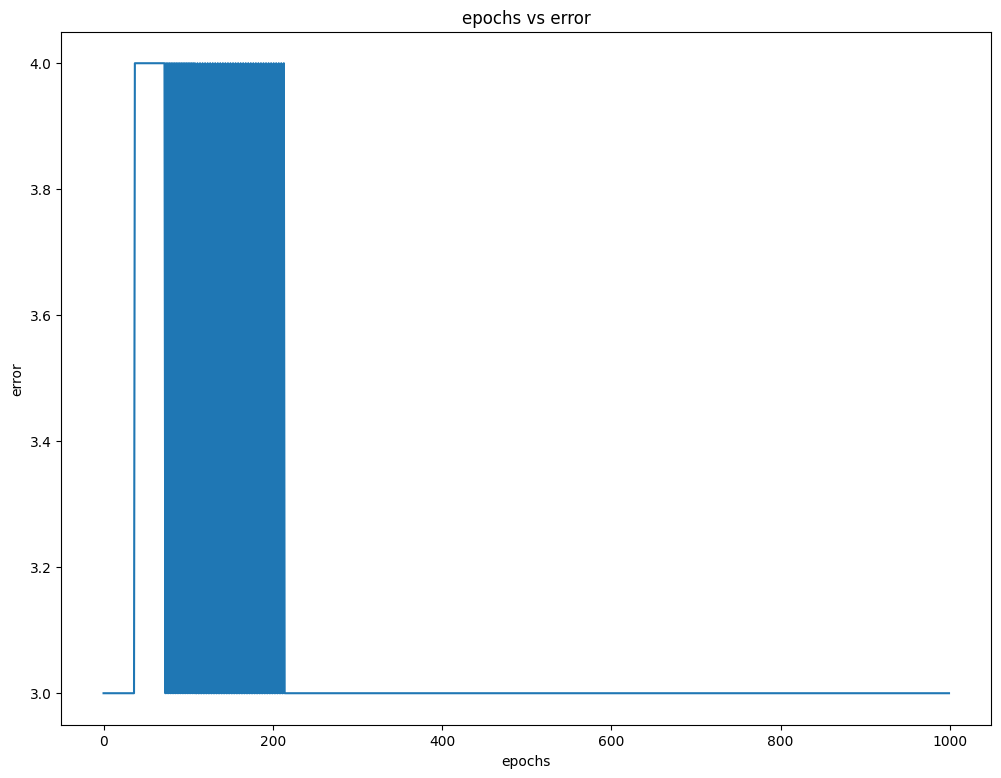

In [6]:
And = Perceptron([10,0.2,-0.75],1000,'step',0.05)
And.learn(and_gate)
And.graph()


 A2)Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function


Initial Weights:[10, 0.2, -0.75]
Final weights : [0.10000000000003427, 0.09999999999999777, 0.050000000000012645], Epochs = 1000


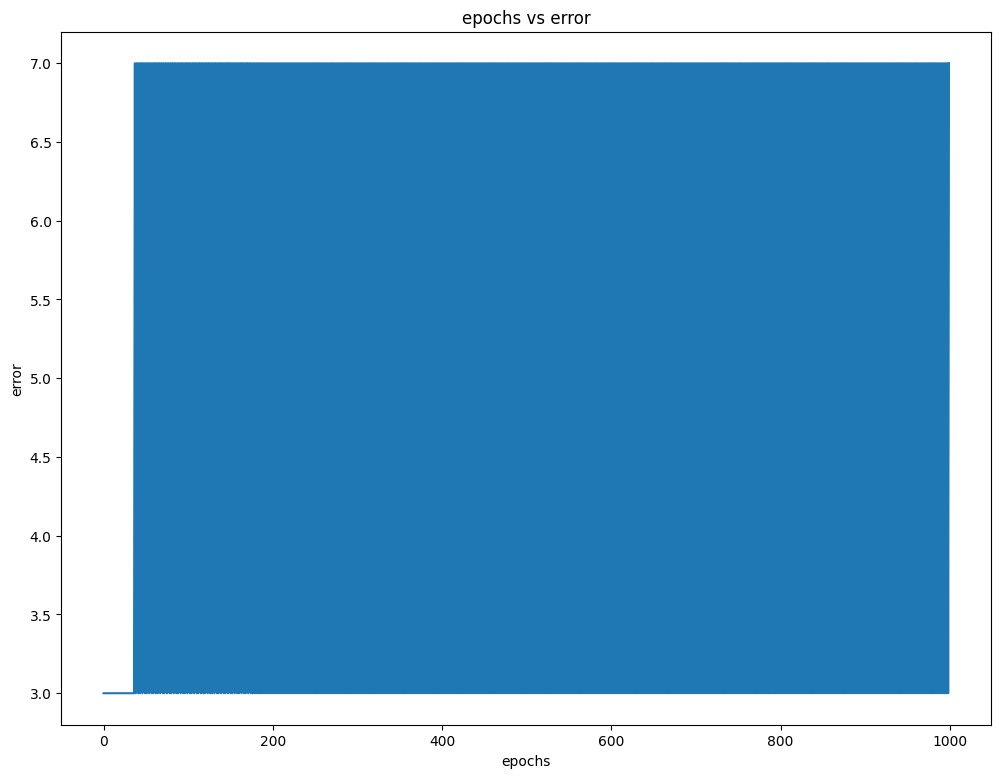

In [7]:
# Bipolar Step Function
and_2 = Perceptron([10,0.2,-0.75],1000,'bipolar',0.05)
and_2.learn(and_gate)
and_2.graph()


Initial Weights:[10, 0.2, -0.75]
Final weights : [-2.628285432165413, 1.7528425503169744, 1.7378039027326262], Epochs = 1000


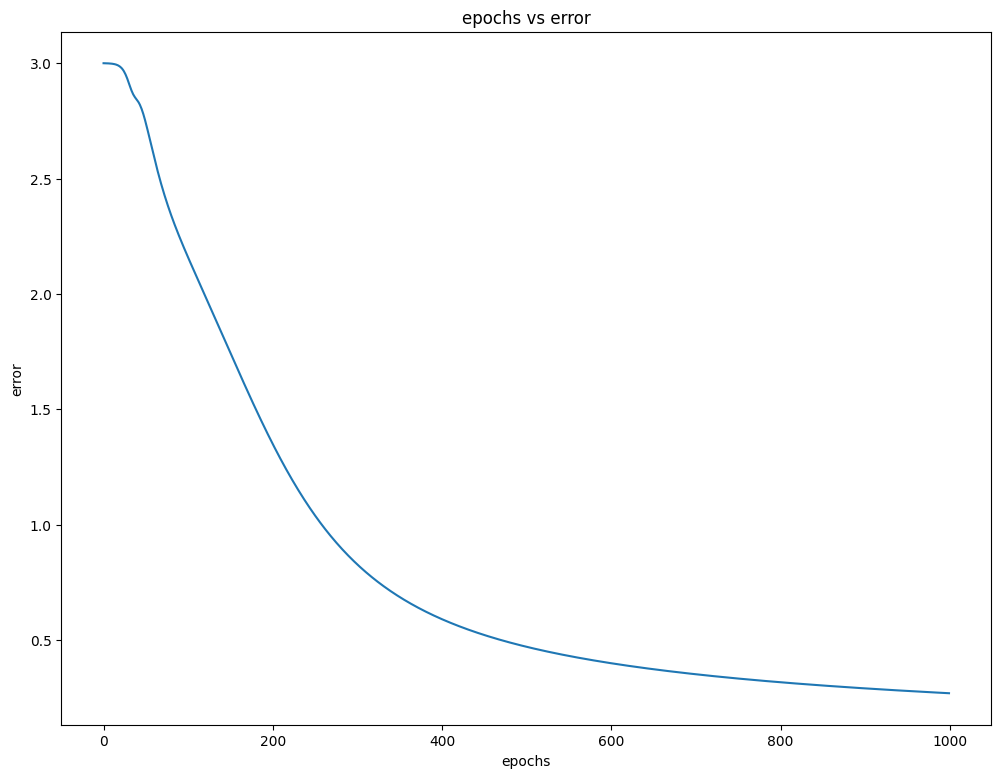

In [8]:
# Sigmoid Function
and_3 = Perceptron([10,0.2,-0.75],1000,'sigmoid',0.05)
and_3.learn(and_gate)
and_3.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [109.99999999999588, 50.199999999999285, 49.24999999999934], Epochs = 1000


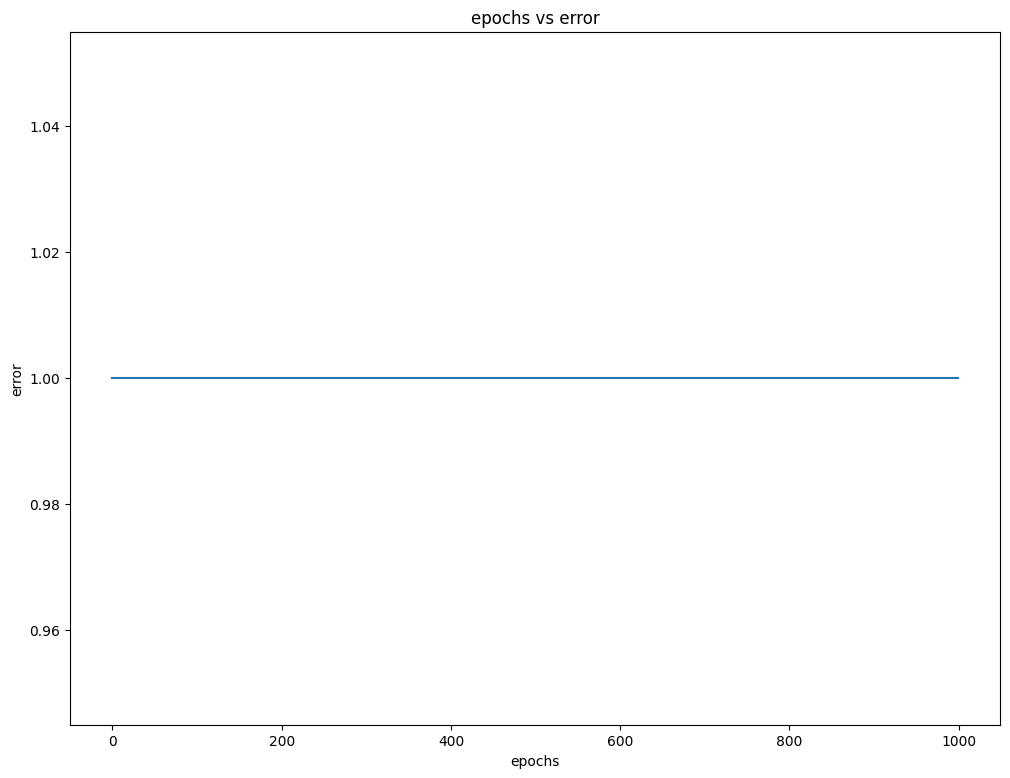

In [10]:
# ReLU Function
and_4 = Perceptron([10,0.2,-0.75],1000,'relu',0.05)
and_4.learn(and_gate)
and_4.graph()


A3. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates.

Initial Weights:[10, 0.2, -0.75]
Final weights : [-3.5385648723861842, 2.393722114096895, 2.369645614250453], Epochs = 1000
[1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-4.34910075148687, 2.971570490653871, 2.9322343173162055], Epochs = 1000
[1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-4.800271329248686, 3.301417583274812, 3.2486905182188353], Epochs = 1000
[1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.115077445658475, 3.5371259162036783, 3.4720615651714937], Epochs = 1000
[1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.35773589807897, 3.7228829437590805, 3.646182728321556], Epochs = 1000
[1000, 1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.555744885152337, 3.877626716793616, 3.789800098564246], Epochs = 1000
[1000, 1000, 1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.723435001191182, 4.01124344795238, 3.9126814236696554], Epochs = 1000
[10

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

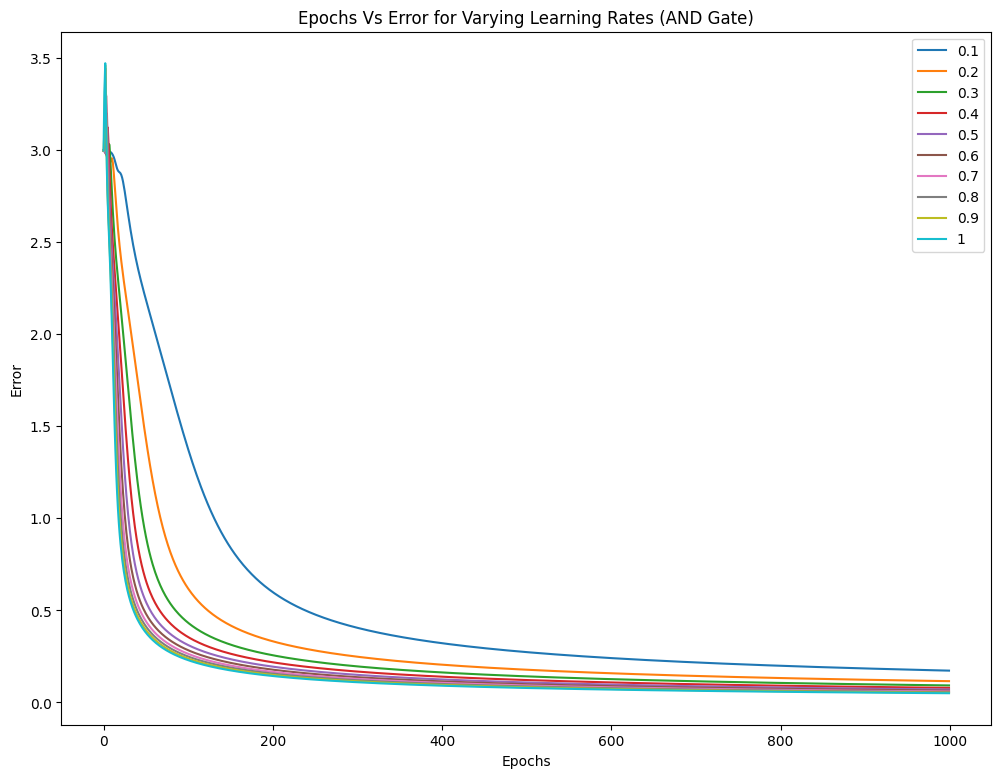

In [11]:

learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
errors = []
epochs = []
for i in learning_rate:
  P=Perceptron([10,0.2,-0.75],1000,'sigmoid',i)
  errors.append(P.learn(and_gate))
  epochs.append(P.epoch_count())
  print(epochs)
  plt.figure(figsize=(12,9))
for i in errors:
    plt.plot(range(1000), i)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Epochs Vs Error for Varying Learning Rates (AND Gate)")
    plt.legend(learning_rate)
